In [212]:
import statsmodels.api as sm
import numpy as np
from econml.dml import LinearDML
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor

MC_N = 50
MC_θ = np.zeros((MC_N,4))
MC_y = np.zeros((MC_N,4))
MC_t = np.zeros((MC_N,4))

for j in range(MC_N):
    import numpy as np
    N = 10000
    σ_t = 1
    σ_y = 1
    σ_x = 1
    θ = 0.5 # TRUE ATE
    α_t = 0.5
    α_y = 0.5
    x = np.random.normal(0,σ_x,N)
    e_t = np.random.normal(0,σ_t,N)
    e_y = np.random.normal(0,σ_y,N)
    t = np.random.binomial(1, np.exp(α_t * x)/(1+np.exp(α_t * x)))
    y = np.power(np.exp(α_y * x),2) + θ * t + e_y
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    t = t.reshape(-1, 1)
    data = np.c_[y,t,x]
    print(data[0:5])
    
    # OLS - Full Estimation
    model_OLS = sm.OLS(y, np.c_[t,x])
    res = model_OLS.fit()
    θ_OLS = res.params[0]
    # OLS First Stage: Y
    model_OLS = sm.OLS(y, np.c_[x])
    res_y = model_OLS.fit()
    θ_OLS_y = res_y.params[0]    
    # Logistic First Stage
    clf = LogisticRegression(random_state=0).fit(x, t)
    
    # DML Lasso
    model_Lasso = LinearDML(discrete_treatment=True, random_state=1)
    model_Lasso.fit(y, t, X=None,W=x)
    θ_DMLL = model_Lasso.intercept_

    # DML RF
    model_XGB = LinearDML(discrete_treatment=True, model_y = XGBRegressor(n_estimators = 500, 
                                                                          max_depth = 8, 
                                                                          learning_rate=0.01), 
                          model_t = XGBClassifier(n_estimators = 500,
                                                  max_depth = 3,
                                                  learning_rate=0.01))
    model_XGB.fit(y.ravel(), t.ravel(), X=None,W=x)
    θ_DMLRF = model_XGB.intercept_
    
    # DML NN - First Stage
    model_NN = LinearDML(discrete_treatment=True, model_y = MLPRegressor(), model_t = MLPClassifier())
    model_NN.fit(y.ravel(), t.ravel(), X=None,W=x)
    θ_DMLRF = model_NN.intercept_


    MC_θ[j] = [res.rsquared, model_XGB.intercept_, model_XGB.intercept_, model_XGB.intercept_]
    MC_y[j] = [res_y.rsquared, np.mean(model_Lasso.nuisance_scores_y), np.mean(model_XGB.nuisance_scores_y),np.mean(model_NN.nuisance_scores_y)]
    MC_t[j] = [clf.score(x,t), np.mean(model_Lasso.nuisance_scores_t), np.mean(model_XGB.nuisance_scores_t),np.mean(model_NN.nuisance_scores_t)]
    
    

[[ 0.75502675  0.         -1.49721933]
 [ 0.73289707  1.         -0.1772263 ]
 [ 3.44502448  0.          0.41034591]
 [ 6.2012002   1.          1.7732367 ]
 [ 0.70422561  1.         -1.3191929 ]]


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.8169273   0.         -0.49572818]
 [ 3.05259409  1.          1.06138069]
 [-0.20417319  0.         -2.04244604]
 [ 1.92075957  0.          0.91841002]
 [ 1.52571366  1.          0.71698027]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.97463954  1.          0.1078117 ]
 [ 3.36022888  1.         -0.50354175]
 [ 1.51902564  1.         -0.10889478]
 [ 3.4413764   1.          0.52633701]
 [ 0.27995703  0.         -1.49480479]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[15.55054992  1.          2.68864332]
 [ 4.36575969  1.          0.42952996]
 [ 2.62958011  0.          0.89684227]
 [ 7.00450392  1.          1.7736063 ]
 [ 8.60232537  1.          1.8550371 ]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.02525431  0.         -0.55843627]
 [ 0.71764379  0.         -0.20463209]
 [-0.48445033  0.         -0.42623749]
 [-0.22499695  0.          0.35931317]
 [-0.17953204  1.         -1.55404101]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 3.14463819  1.          0.44565039]
 [-0.32798856  0.         -1.16359171]
 [ 2.32710989  1.          0.12440444]
 [-0.68060503  0.         -0.64561447]
 [ 0.63850566  1.         -0.69800118]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.37639544  1.          0.701314  ]
 [ 0.54594197  0.         -0.34198234]
 [ 4.27688028  0.          1.15658212]
 [ 4.29868811  1.          0.81475994]
 [ 2.89735281  0.          0.69613777]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.6633472   1.          0.46915442]
 [ 1.7714821   1.         -0.1567405 ]
 [ 5.06551288  1.          1.17149174]
 [ 0.72375282  0.         -0.60409612]
 [ 1.62062409  1.          0.19859521]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.04271208  0.         -0.20104781]
 [ 0.56840878  0.         -0.68199713]
 [ 2.02592611  0.          0.91660888]
 [-0.05014196  1.         -1.74837004]
 [ 2.28407738  0.          0.03490633]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 4.038821    1.          1.13087658]
 [ 8.31918523  0.          2.12205876]
 [-0.30786005  0.         -1.5155495 ]
 [ 3.43406401  0.          1.1984228 ]
 [ 1.03222408  1.         -0.68866387]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 3.94890085  1.          0.83631254]
 [ 3.56400357  1.         -0.29768633]
 [ 1.7796542   1.         -0.31213273]
 [ 1.74499283  0.          0.60144864]
 [ 2.22623414  1.          0.19757931]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.59249913  0.         -0.64596345]
 [ 2.47483644  0.          0.36287666]
 [ 0.33919377  0.          0.3532861 ]
 [ 1.26933242  0.         -0.69067319]
 [ 0.36534182  0.         -1.56169538]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.77209196  0.          0.0371364 ]
 [ 2.38643228  1.          0.20367953]
 [ 0.69934975  1.         -0.63529233]
 [ 2.42523041  0.         -0.71762794]
 [ 0.1924297   1.         -0.94888741]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.94748732  1.          0.29758279]
 [ 0.82785618  0.          0.6762028 ]
 [ 0.91140614  0.         -0.37867582]
 [ 0.32627233  0.         -0.06823018]
 [ 1.5149204   1.         -0.08564931]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.12702259  0.          0.23165015]
 [ 3.09128586  1.          0.43793519]
 [ 1.35931477  0.          0.01375667]
 [ 1.47170343  1.         -0.1945484 ]
 [ 1.24261161  1.          0.05952845]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.80324882  1.          1.00158475]
 [ 0.99323002  0.         -0.49524101]
 [ 0.29198786  1.          0.29698174]
 [ 1.19826289  0.          0.25679834]
 [ 2.2840466   1.          0.71931702]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.06638168  1.          0.16134218]
 [ 1.75318388  1.         -0.60197213]
 [ 2.90342062  1.          0.56773634]
 [ 2.85032919  1.          0.08542162]
 [ 1.60624511  1.         -1.05583366]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.69891727  0.         -0.0367808 ]
 [ 2.47587693  0.          1.13257886]
 [ 3.43485768  1.          1.0359117 ]
 [ 2.94928196  1.          0.5926063 ]
 [ 0.16674739  0.         -1.28320663]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.44171053  1.         -1.61350435]
 [ 2.73320556  0.          0.17002034]
 [-0.02834922  0.         -1.54232593]
 [-0.36965557  1.          0.04587863]
 [ 1.64594951  0.         -0.43044055]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.01810581  0.         -1.85808168]
 [ 2.63197432  1.          0.87158918]
 [ 1.71745809  0.         -0.59831916]
 [ 0.59334129  0.         -0.59734861]
 [ 0.62894961  0.         -1.91563805]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.29040453  0.          0.26856187]
 [ 3.28860745  1.          0.84509975]
 [ 0.24460773  0.         -0.46251315]
 [ 2.01492088  1.          0.36865397]
 [ 0.6153323   1.         -2.29973855]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.88045271  1.         -1.38472362]
 [ 2.0752209   1.          0.98970508]
 [ 1.19322136  1.          0.2778406 ]
 [ 0.5414784   1.         -0.64049182]
 [ 1.26660243  0.          0.8693008 ]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.24185146e+00  1.00000000e+00 -1.73910137e-01]
 [-3.58153681e-01  0.00000000e+00 -1.69316200e-02]
 [ 2.49824838e-01  0.00000000e+00 -1.25078334e+00]
 [ 1.93049537e+01  1.00000000e+00  2.93902489e+00]
 [ 1.88897032e+00  1.00000000e+00 -9.85329125e-01]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.47709056  1.         -0.18768295]
 [ 5.89996289  1.          1.41211114]
 [ 0.95595451  0.          0.52831116]
 [ 5.06450791  1.          1.26564693]
 [ 0.22482774  0.         -0.59458352]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.69173783  0.          0.95108689]
 [ 2.29364784  1.          0.89231083]
 [ 0.79432209  1.         -0.82228607]
 [ 1.31264812  1.         -0.12363101]
 [ 2.80675887  0.          0.84319729]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 3.1600892   1.          0.50661554]
 [ 3.07323649  1.          0.49878476]
 [ 2.07864176  1.         -0.82167592]
 [ 1.11143744  1.          0.79725986]
 [ 2.32584236  1.          0.00857614]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.07544056  0.         -1.26474754]
 [ 4.94914901  1.          1.70473104]
 [ 1.06108138  0.         -0.087314  ]
 [ 0.78074071  0.         -0.44436712]
 [ 3.66610441  1.          0.99330196]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.04686667  1.         -0.4120457 ]
 [ 2.78324189  0.          1.07754726]
 [ 1.41075506  1.         -0.08479191]
 [ 3.97716737  0.          1.3683487 ]
 [ 2.63356238  1.          0.67317844]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.07335492  0.         -0.66194319]
 [-1.11085633  1.         -0.93768383]
 [-0.17615236  0.         -1.35220501]
 [ 4.73563688  1.          0.84645312]
 [-0.03040969  0.         -2.31511523]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 3.02845568  1.          0.9109321 ]
 [ 2.56193565  1.         -0.1073926 ]
 [ 0.48843175  0.         -0.04997719]
 [ 1.47042863  0.         -0.78478974]
 [ 3.22553413  0.          1.40737025]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.48159129  0.         -0.0617387 ]
 [ 1.31611155  0.          0.06606176]
 [-0.2026655   0.         -0.55002402]
 [ 1.61053127  1.         -0.15175054]
 [ 0.46860185  0.         -1.63974978]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.18963004  1.         -0.34276833]
 [-0.09161645  0.         -0.76523986]
 [ 2.31606858  1.         -0.79484135]
 [ 2.05498008  0.          0.54659575]
 [ 2.08022929  1.         -0.61386072]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.22478934  0.         -0.54132553]
 [ 1.0399457   0.         -0.28816014]
 [ 1.33592897  1.         -0.2247746 ]
 [ 1.76577415  0.          0.37879693]
 [ 2.49926087  1.          0.86410434]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.4654225   1.         -1.29126218]
 [ 1.51821663  0.          0.21668199]
 [ 0.2820829   1.         -0.37522151]
 [-0.27266871  0.         -1.25231393]
 [-0.75679269  0.         -0.75941825]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.87949059  1.         -0.07076205]
 [ 3.62921878  0.          1.22006524]
 [-0.37871673  0.         -0.52212767]
 [-0.86273723  1.         -2.33601941]
 [-0.28508312  0.         -0.0537529 ]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.21817352  0.          0.24827036]
 [-0.85892359  0.         -1.3286226 ]
 [ 6.97686598  0.          1.97767346]
 [ 2.19850733  0.          1.18602105]
 [ 3.48778624  1.          0.65972584]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.10120517  0.          0.4004701 ]
 [ 1.51813456  0.         -0.38767329]
 [-0.44108233  0.         -1.4990301 ]
 [-0.38088736  1.          0.31479707]
 [-0.88747832  1.         -0.11254   ]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


[[ 4.23065536  1.          1.25758528]
 [ 2.45113315  1.          0.06703853]
 [ 0.04326205  0.         -0.41795324]
 [ 3.78688294  1.          1.12865647]
 [ 2.53514042  1.          0.42195948]]


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.95246311  0.          0.53125185]
 [ 3.11367956  1.          1.09216701]
 [ 0.39923438  0.          0.55311364]
 [ 1.87779756  0.         -0.38937411]
 [ 2.56291833  0.          1.19998389]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[4.76339896 1.         1.49783628]
 [7.964092   1.         2.05841222]
 [2.91799666 0.         0.59690225]
 [4.14892176 1.         1.2526811 ]
 [2.93875749 0.         1.04869854]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.69989213  1.          0.16825485]
 [ 3.7389066   1.          0.56398044]
 [ 7.63708488  1.          1.91676286]
 [ 4.62878835  0.          1.17523695]
 [ 1.55974252  0.         -0.09940811]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.43372666  1.         -0.19197351]
 [ 2.62360501  1.         -0.53805172]
 [-0.14589491  0.         -0.107212  ]
 [ 2.20123883  0.          0.43690861]
 [ 1.61015638  0.         -0.59463946]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


[[ 0.87161877  0.         -1.67257205]
 [ 0.98773547  1.         -1.84689426]
 [ 0.95272769  0.         -0.11550284]
 [ 3.3215621   1.          0.03566731]
 [-0.82626641  0.         -1.13458477]]


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.62947062  0.         -1.3184801 ]
 [ 0.76230928  1.          0.64184012]
 [ 0.7468941   1.         -1.25840342]
 [ 3.19183707  0.          1.32776537]
 [ 0.04830169  1.         -0.57794138]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 5.97955153  0.          1.77866236]
 [ 5.57868014  1.          1.65702663]
 [ 2.1541391   1.         -0.61298417]
 [-0.58546401  0.          0.03246042]
 [ 1.92835524  0.         -0.34199825]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.12962158  0.         -0.73025374]
 [-0.3637323   1.         -1.99675736]
 [ 0.9607627   1.         -0.0325061 ]
 [ 1.80286607  1.          0.41859248]
 [ 7.48192275  0.          2.20193996]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.32106727  1.          0.16614019]
 [ 2.12108758  0.         -0.72893789]
 [-0.49957125  1.         -1.16069516]
 [-0.70564613  1.          0.02724985]
 [ 2.5632328   1.          0.14854731]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.58322015  0.         -1.52122752]
 [-0.50411449  0.         -0.01314415]
 [ 0.52577336  1.          0.06212858]
 [ 0.75650884  0.          0.19804753]
 [-0.15745484  0.         -0.99854993]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-2.29597169  0.         -2.00597479]
 [ 2.652526    0.         -0.69658511]
 [ 7.91565989  1.          1.69637109]
 [ 3.70550385  1.          0.86429635]
 [ 3.10207782  1.          1.05738039]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.24061711  0.         -0.21437004]
 [ 1.29077675  0.         -1.22192617]
 [ 2.56573461  0.          0.33925939]
 [ 3.83780323  1.          1.09678165]
 [ 1.75841283  0.          0.00526764]]


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [273]:
np.set_printoptions(precision=3)
import Image

print(np.mean(MC_θ, axis = 0))
print(np.std(MC_θ, axis = 0))
print(np.mean(MC_y, axis = 0))
print(np.mean(MC_t, axis = 0))

ModuleNotFoundError: No module named 'Image'

In [260]:
['Mean θ_hat']+ np.mean(MC_θ, axis = 0).tolist()

['Mean θ_hat',
 0.54925529686103,
 0.5075439437968791,
 0.5075439437968791,
 0.5075439437968791]

In [292]:
from prettytable import PrettyTable
from PIL import Image, ImageDraw, ImageFont
table = PrettyTable()
table.field_names = ['Var', 'OLS','DML-L','DML-XGB','DML-NN']
a = ['Mean θ_hat']+ np.mean(MC_θ, axis = 0).tolist()
table.add_row(a)
a = ['Stdev θ_hat']+ np.std(MC_θ, axis = 0).tolist()
table.add_row(a)
a = ['97.5 Quantile θ_hat']+ np.quantile(MC_θ,0.975, axis = 0).tolist()
table.add_row(a)
a = ['2.5 Quantile θ_hat']+ np.quantile(MC_θ,0.025, axis = 0).tolist()
table.add_row(a)
a = ['First Stage Y R2']+ np.mean(MC_y, axis = 0).tolist()
table.add_row(a)
a = ['First Stage D Accuracy']+ np.mean(MC_t, axis = 0).tolist()
table.add_row(a)
table.float_format = '0.3'
print(table)

+------------------------+-------+-------+---------+--------+
|          Var           |  OLS  | DML-L | DML-XGB | DML-NN |
+------------------------+-------+-------+---------+--------+
|       Mean θ_hat       | 0.549 | 0.508 |  0.508  | 0.508  |
|      Stdev θ_hat       | 0.024 | 0.021 |  0.021  | 0.021  |
|  97.5 Quantile θ_hat   | 0.573 | 0.548 |  0.548  | 0.548  |
|   2.5 Quantile θ_hat   | 0.505 | 0.474 |  0.474  | 0.474  |
|    First Stage Y R2    | 0.305 | 0.491 |  0.794  | 0.799  |
| First Stage D Accuracy | 0.596 | 0.596 |  0.593  | 0.596  |
+------------------------+-------+-------+---------+--------+


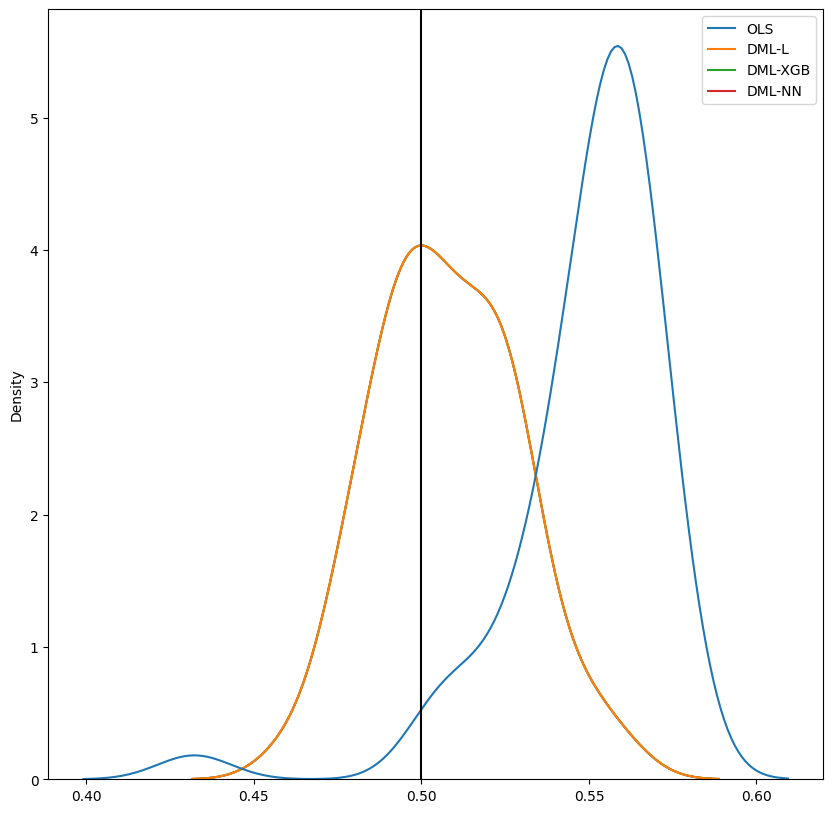

In [295]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
df = pd.DataFrame(MC_θ,columns=['OLS','DML-L','DML-XGB','DML-NN'])
plt.figure(figsize=(10,10))
sns.kdeplot(df)
plt.axvline(0.5, color='black')
plt.savefig('ex2g.png')